In [1]:
### importing libraries
import numpy as np
import pandas as pd


In [2]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Lambda,Input,Flatten
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob

In [3]:
### Resize all images
Image_size=[224,224]
train_path='data/train/'
valid_path='data/val/'

In [4]:
### importing resnet50
### we are using imagenet weights

resnet=ResNet50(include_top=False,weights='imagenet',input_shape=Image_size+[3])

In [5]:
### not training existing weights
for layer in resnet.layers:
  layer.trainable=False

In [6]:
### folders
folders=glob('data/train/*')

In [7]:
len(folders)

4

In [8]:
### Flattening
x=Flatten()(resnet.output)
x

<tf.Tensor 'flatten/Reshape:0' shape=(None, 100352) dtype=float32>

In [9]:
prediction=Dense(len(folders),activation='softmax')(x)
prediction

<tf.Tensor 'dense/Softmax:0' shape=(None, 4) dtype=float32>

In [10]:
### creating model
model=Model(inputs=resnet.input,outputs=prediction)

In [11]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [12]:
### Compiling model
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')

In [13]:
### Image Datagenerator
train_datagen=ImageDataGenerator(rescale=1./255,
                                 shear_range=0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)

In [14]:
training_set=train_datagen.flow_from_directory('data/train/',target_size=(224,224),
                                               batch_size=32,class_mode='categorical')

Found 1951 images belonging to 4 classes.


In [16]:
test_set=train_datagen.flow_from_directory('data/test',target_size=(224,224),
                                               batch_size=32,class_mode='categorical')

Found 18 images belonging to 4 classes.


In [17]:
r=model.fit_generator(training_set,
                      validation_data=test_set,
                      epochs=20,
                      steps_per_epoch=len(training_set),
                      validation_steps=len(test_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
61/61 [==============================] - 169s 3s/step - loss: 2.4663 - accuracy: 0.3947 - val_loss: 1.7319 - val_accuracy: 0.3333
Epoch 2/20
61/61 [==============================] - 142s 2s/step - loss: 1.0988 - accuracy: 0.5771 - val_loss: 1.4635 - val_accuracy: 0.5556
Epoch 3/20
61/61 [==============================] - 144s 2s/step - loss: 0.9472 - accuracy: 0.6448 - val_loss: 0.7516 - val_accuracy: 0.7222
Epoch 4/20
61/61 [==============================] - 146s 2s/step - loss: 0.9577 - accuracy: 0.6258 - val_loss: 1.2030 - val_accuracy: 0.5000
Epoch 5/20
61/61 [==============================] - 154s 3s/step - loss: 0.8696 - accuracy: 0.6550 - val_loss: 0.9867 - val_accuracy: 0.6667
Epoch 6/20
61/61 [==============================] - 159s 3s/step - loss: 0.8668 - accuracy: 0.6715 - val_loss: 0.5441 - val_accuracy: 0.7778
Epoch 7/20
61/61 [==============================] - 159s 3s/step - loss: 0.827

In [18]:
import matplotlib.pyplot as plt

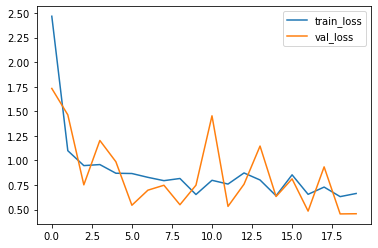

In [19]:
### plotting loss
plt.plot(r.history['loss'],label='train_loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


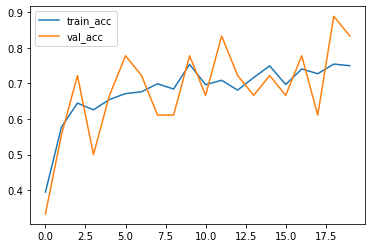

In [20]:
### plotting accuracy
plt.plot(r.history['accuracy'],label='train_acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()


In [21]:

from tensorflow.keras.models import load_model

model.save('model_resnet50.h5')

In [22]:
y_pred = model.predict(test_set)
y_pred

array([[1.07520007e-01, 7.15147316e-01, 3.86182452e-03, 1.73470825e-01],
       [1.87170729e-02, 9.28410050e-03, 9.19415709e-03, 9.62804675e-01],
       [5.19809306e-01, 2.72429939e-02, 1.76527113e-01, 2.76420593e-01],
       [1.09445825e-02, 1.07991956e-01, 1.79915631e-03, 8.79264295e-01],
       [1.45244449e-01, 7.99686015e-01, 4.16083261e-03, 5.09086810e-02],
       [2.45648194e-02, 9.24143434e-01, 1.27004896e-04, 5.11646792e-02],
       [8.18356574e-01, 3.49815190e-02, 1.41981919e-03, 1.45242110e-01],
       [9.98358071e-01, 6.96821598e-06, 3.66459801e-07, 1.63458916e-03],
       [1.68985590e-01, 2.07460194e-04, 7.00590681e-05, 8.30736876e-01],
       [4.23834652e-01, 3.90806235e-04, 5.75459421e-01, 3.15132842e-04],
       [7.77821708e-03, 7.21275515e-04, 9.84407306e-01, 7.09327357e-03],
       [2.70818844e-02, 4.15218920e-02, 1.89750418e-02, 9.12421227e-01],
       [1.19626522e-01, 6.39475822e-01, 2.35776679e-04, 2.40661874e-01],
       [2.43926831e-02, 1.08357817e-01, 2.14214083e

In [23]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred


array([1, 3, 0, 3, 1, 1, 0, 0, 3, 2, 2, 3, 1, 3, 0, 2, 2, 0], dtype=int64)

In [25]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [26]:
model=load_model('model_resnet50.h5')


In [28]:

### predicting

In [29]:
img=image.load_img('data/test/diseased cotton leaf/dis_leaf (124).jpg',target_size=(224,224))


In [30]:

x=image.img_to_array(img)
x

array([[[ 86.,  84.,  71.],
        [ 83.,  85.,  72.],
        [ 77.,  75.,  62.],
        ...,
        [116.,  96.,  85.],
        [148., 128., 117.],
        [135., 115., 104.]],

       [[134., 130., 119.],
        [103., 100.,  83.],
        [ 99.,  97.,  84.],
        ...,
        [105.,  88.,  80.],
        [127., 107.,  96.],
        [127., 107.,  96.]],

       [[152., 143., 138.],
        [163., 153., 143.],
        [ 80.,  77.,  60.],
        ...,
        [112.,  95.,  87.],
        [127., 107.,  96.],
        [126., 107.,  93.]],

       ...,

       [[170., 183., 137.],
        [114., 116.,  94.],
        [ 88.,  79.,  74.],
        ...,
        [157., 139., 135.],
        [150., 135., 130.],
        [117., 106., 102.]],

       [[151., 157., 119.],
        [ 99.,  93.,  77.],
        [ 95.,  86.,  81.],
        ...,
        [133., 116., 109.],
        [116., 101.,  94.],
        [121., 110., 106.]],

       [[104.,  97.,  79.],
        [ 99.,  90.,  81.],
        [ 88.,  

In [31]:
x.shape

(224, 224, 3)

In [32]:
x=x/255
x

array([[[0.3372549 , 0.32941177, 0.2784314 ],
        [0.3254902 , 0.33333334, 0.28235295],
        [0.3019608 , 0.29411766, 0.24313726],
        ...,
        [0.45490196, 0.3764706 , 0.33333334],
        [0.5803922 , 0.5019608 , 0.45882353],
        [0.5294118 , 0.4509804 , 0.40784314]],

       [[0.5254902 , 0.50980395, 0.46666667],
        [0.40392157, 0.39215687, 0.3254902 ],
        [0.3882353 , 0.38039216, 0.32941177],
        ...,
        [0.4117647 , 0.34509805, 0.3137255 ],
        [0.49803922, 0.41960785, 0.3764706 ],
        [0.49803922, 0.41960785, 0.3764706 ]],

       [[0.59607846, 0.56078434, 0.5411765 ],
        [0.6392157 , 0.6       , 0.56078434],
        [0.3137255 , 0.3019608 , 0.23529412],
        ...,
        [0.4392157 , 0.37254903, 0.34117648],
        [0.49803922, 0.41960785, 0.3764706 ],
        [0.49411765, 0.41960785, 0.3647059 ]],

       ...,

       [[0.6666667 , 0.7176471 , 0.5372549 ],
        [0.44705883, 0.45490196, 0.36862746],
        [0.34509805, 0

In [33]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [34]:
model.predict(img_data)


array([[5.1092997e-02, 9.5312320e-22, 9.4890696e-01, 8.0002113e-22]],
      dtype=float32)

In [35]:
a=np.argmax(model.predict(img_data), axis=1)

In [36]:
a

array([2], dtype=int64)

In [37]:
a==1

array([False])

In [38]:
a==2

array([ True])